In [1]:
import pandas as pd
import numpy as np
import matplotlib


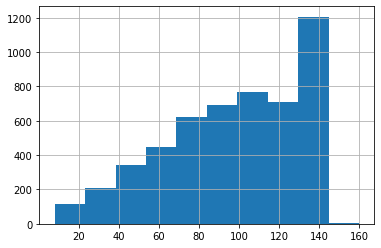

In [2]:
url = "https://raw.githubusercontent.com/zfz/twitter_corpus/master/full-corpus.csv"
tweets=pd.read_csv(url)
tweets['TweetText'].str.len().hist()
# What we have done here is that we are wokring with a list of tweets that i found on GitHub and we 
#going to use NLP on them to see what we can find. the tweets are allredy ordered into sentimnet...
#this is a length of teh tweet. most of them are at around 140
#Tweets aboout mobile phones...


In [15]:
import nltk #for stop words
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = set(stopwords.words('english'))
# the stop words are words like and this (which have no real meaning)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tomashegewisch/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<BarContainer object of 10 artists>

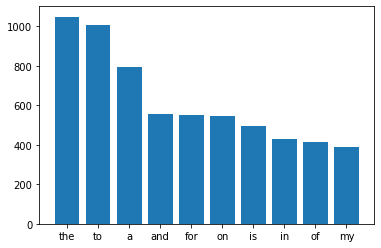

In [31]:
corpus = []
new = tweets['TweetText'].str.split()
new = new.values.tolist()
corpus = [word for i in new for word in i]

from collections import defaultdict
dic =defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

import matplotlib.pyplot as plt
top = sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y = zip(*top)
plt.bar(x,y)
# this is a bar chart on the popularity of the words... This is not usefull we need to remove the stop
wokds

In [43]:
# After running I found that the stop words were not removing twitter epecifc words, So we will remove
# them by adding data to the wstop words

stop.add("RT")
stop.add("de")
stop.add("...")
stop.add("&")
stop.add("I")
stop.add("-")
stop.add("el")
stop.add("en")
stop.add("new")
stop.add("que")

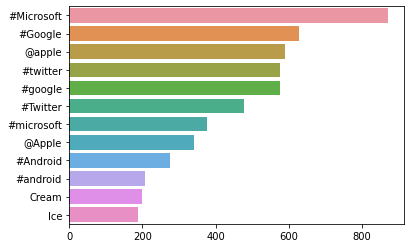

In [44]:
import seaborn as sns
from collections import Counter

counter = Counter(corpus)
most = counter.most_common()

x, y = [], []
for word, count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
sns.barplot (x = y, y = x)

In [92]:
from textblob import TextBlob
TextBlob('''Lol Fikile Mbalula has deleted this tweet, 
some of our Ministers and celebs seems like they just tweet without thinking first.''').sentiment

Sentiment(polarity=0.525, subjectivity=0.5166666666666666)

In [70]:
new = tweets['TweetText']
new = new.values.tolist()
avg = 0
for i in new:
    avg += TextBlob(i).sentiment.polarity
    #print(avg)
avg = avg/len(new)
print(avg)
#It is mostly postive..... (but we are not sure)

0.09037202019468395


In [81]:
#lets look for duplicate tweets
tweetList = tweets['TweetText'].tolist()